In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d prathamgrover/brain-tumor-classification

100% 86.8M/86.8M [00:04<00:00, 25.8MB/s]
100% 86.8M/86.8M [00:04<00:00, 20.8MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/brain-tumor-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout

In [28]:
## Create The Generator To load Data To Model
train_data = keras.utils.image_dataset_from_directory(
    directory="/content/Training",
    batch_size = 10,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"
)

Found 2870 files belonging to 4 classes.


In [29]:
validation_data = keras.utils.image_dataset_from_directory(
    directory="/content/Testing",
    batch_size = 10,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"
)

Found 394 files belonging to 4 classes.


In [30]:
import tensorflow
# Scale Data Using Min MAx Scaling
def min_max_scaling(img,lable):
  tensorflow.cast(img/255,tensorflow.float32)
  return img,lable


train_data = train_data.map(min_max_scaling)

In [31]:
train_data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [45]:
# create LENET
model = Sequential()

model.add(Conv2D(8,kernel_size=(3,3),padding="same",activation="relu",input_shape=(256,256,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(BatchNormalization())

model.add(Conv2D(18,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(BatchNormalization())

model.add(Conv2D(18,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(100,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(80,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(45,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(4,activation="softmax"))

In [46]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 128, 128, 8)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_23 (Ba  (None, 128, 128, 8)       32        
 tchNormalization)                                               
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 18)      1314      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 64, 64, 18)        0         
 ng2D)                                                           
                                                      

In [19]:
early_stopping = tensorflow.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

In [48]:
# now Compile the model
model.compile(
    loss = tensorflow.keras.losses.sparse_categorical_crossentropy,
    optimizer = "Adam",
    metrics = ["accuracy"]
)

In [49]:
history = model.fit(train_data,epochs=30,validation_data=validation_data,callbacks=[early_stopping])

Epoch 1/30
287/287 [==============================] - 13s 28ms/step - loss: 0.8325 - accuracy: 0.6801 - val_loss: 2.3720 - val_accuracy: 0.3655
Epoch 2/30
287/287 [==============================] - 8s 28ms/step - loss: 0.6114 - accuracy: 0.7617 - val_loss: 3.2886 - val_accuracy: 0.3883
Epoch 3/30
287/287 [==============================] - 7s 24ms/step - loss: 0.4279 - accuracy: 0.8401 - val_loss: 2.3243 - val_accuracy: 0.4162
Epoch 4/30
287/287 [==============================] - 8s 29ms/step - loss: 0.4796 - accuracy: 0.8080 - val_loss: 2.0171 - val_accuracy: 0.5102
Epoch 5/30
287/287 [==============================] - 8s 28ms/step - loss: 0.3194 - accuracy: 0.8767 - val_loss: 2.2890 - val_accuracy: 0.6168
Epoch 6/30
287/287 [==============================] - 7s 24ms/step - loss: 0.2590 - accuracy: 0.9073 - val_loss: 3.2136 - val_accuracy: 0.5051
Epoch 7/30
287/287 [==============================] - 9s 31ms/step - loss: 0.2587 - accuracy: 0.9070 - val_loss: 1.6301 - val_accuracy: 0.639

In [50]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.832455,0.680139,2.371979,0.365482
1,0.611448,0.761672,3.288617,0.388325
2,0.427918,0.840070,2.324323,0.416244
3,0.479623,0.808014,2.017125,0.510152
4,0.319388,0.876655,2.289045,0.616751
5,0.259010,0.907317,3.213631,0.505076
6,0.258656,0.906969,1.630096,0.639594
7,0.211840,0.921603,2.335407,0.670051
8,0.180097,0.936585,2.266475,0.670051
9,0.142195,0.949129,2.125337,0.713198


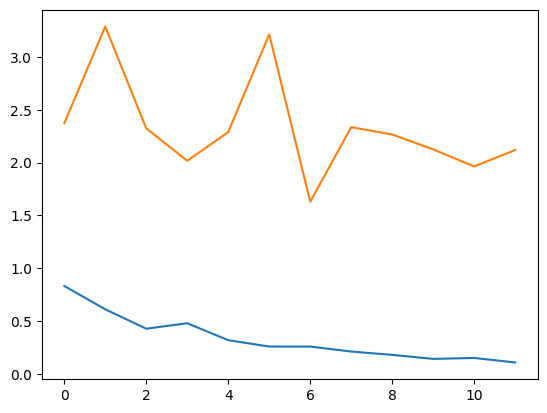

In [54]:
# plot and see the accuracy and loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

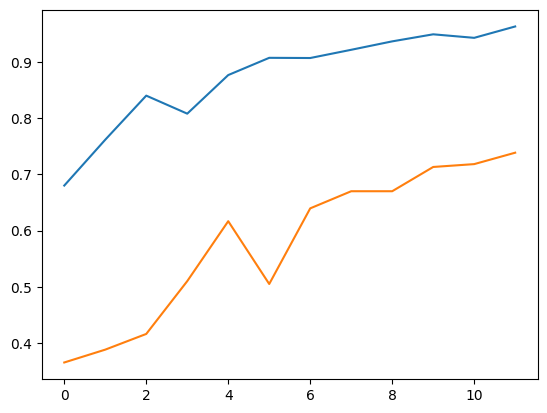

In [52]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

<Axes: >

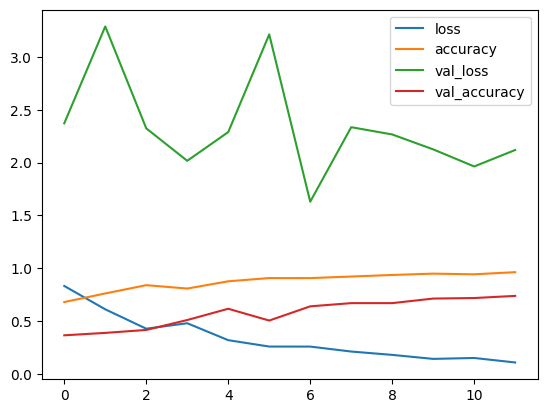

In [55]:
pd.DataFrame(history.history).plot()

In [63]:
brain = cv2.imread("/content/Training/glioma_tumor/gg (10).jpg")

In [64]:
brain.shape

(512, 512, 3)

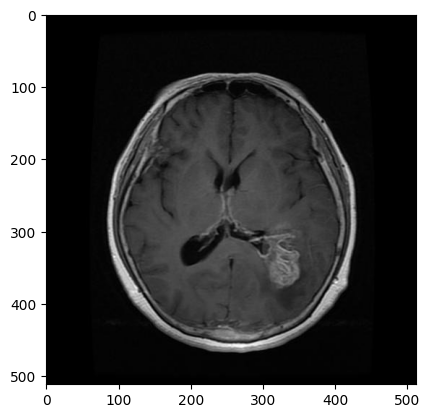

In [65]:
plt.imshow(brain)

In [66]:
test_image = cv2.resize(brain,(256,256))

In [67]:
test_input = test_image.reshape((1,256,256,3))

In [68]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[0.29248703, 0.6762708 , 0.0021789 , 0.02906327]], dtype=float32)